# CLRS Text graphs



* Gemma 2B
* Gemma 2B + RPE
* Gemini Flash


In [1]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
file_path = './accuracy_data.csv'
df = pd.read_csv(file_path)


In [3]:
algos_and_lengths = {
    "articulation_points": [4, 5, 10, 11, 12, 15, 19],
    "activity_selector": [4, 5, 10, 11, 12, 15, 19, 23, 28, 31],
    "bellman_ford": [4, 5, 10, 11, 12, 15, 19, 23, 28, 31],
    "bfs": [4, 5, 10, 11, 12, 15, 19, 23, 28, 31],
    "binary_search": [4, 5, 10, 11, 12, 15, 19, 23, 28, 31],
    "bridges": [4, 5],
    "bubble_sort": [4, 5, 10],
    "dag_shortest_paths": [4, 5, 10, 11, 12, 15, 19],
    "dfs": [4, 5, 10, 11, 12, 15, 19, 23],
    "dijkstra": [4, 5, 10, 11, 12, 15, 19, 23, 28],
    "find_maximum_subarray_kadane": [4, 5, 10, 11, 12, 15, 19, 23, 28, 31],
    "floyd_warshall": [4, 5, 10],
    "graham_scan": [4, 5, 10, 11, 12, 15, 19, 23, 28, 31],
    "heapsort": [4, 5, 10],
    "insertion_sort": [4, 5, 10, 11, 12, 15, 19, 23, 28, 31],
    "jarvis_march": [4, 5, 10, 11, 12],
    "kmp_matcher": [4, 5, 10, 11, 12, 15, 19, 23, 28, 31],
    "lcs_length": [4, 5, 10],
    "matrix_chain_order": [4, 5, 10],
    "minimum": [4, 5, 10, 11, 12, 15, 19, 23, 28, 31],
    "mst_kruskal": [4, 5, 10],
    "mst_prim": [4, 5, 10, 11, 12, 15, 19, 23, 28],
    "naive_string_matcher": [4, 5, 10, 11, 12, 15, 19, 23, 28, 31],
    "optimal_bst": [4, 5, 10],
    "quickselect": [4, 5, 10, 11, 12, 15, 19, 23, 28, 31],
    "quicksort": [4, 5, 10],
    "segments_intersect": [4, 5, 10, 11, 12, 15, 19, 23, 28, 31],
    "strongly_connected_components": [4, 5, 10, 11, 12, 15],
    "task_scheduling": [4, 5, 10, 11, 12, 15, 19, 23, 28, 31],
    "topological_sort": [4, 5, 10, 11, 12, 15, 19, 23],
}

train_lengths_dict = {}
for alg, train_length in algos_and_lengths.items():
  train_lengths_dict[alg] = np.array(train_length)

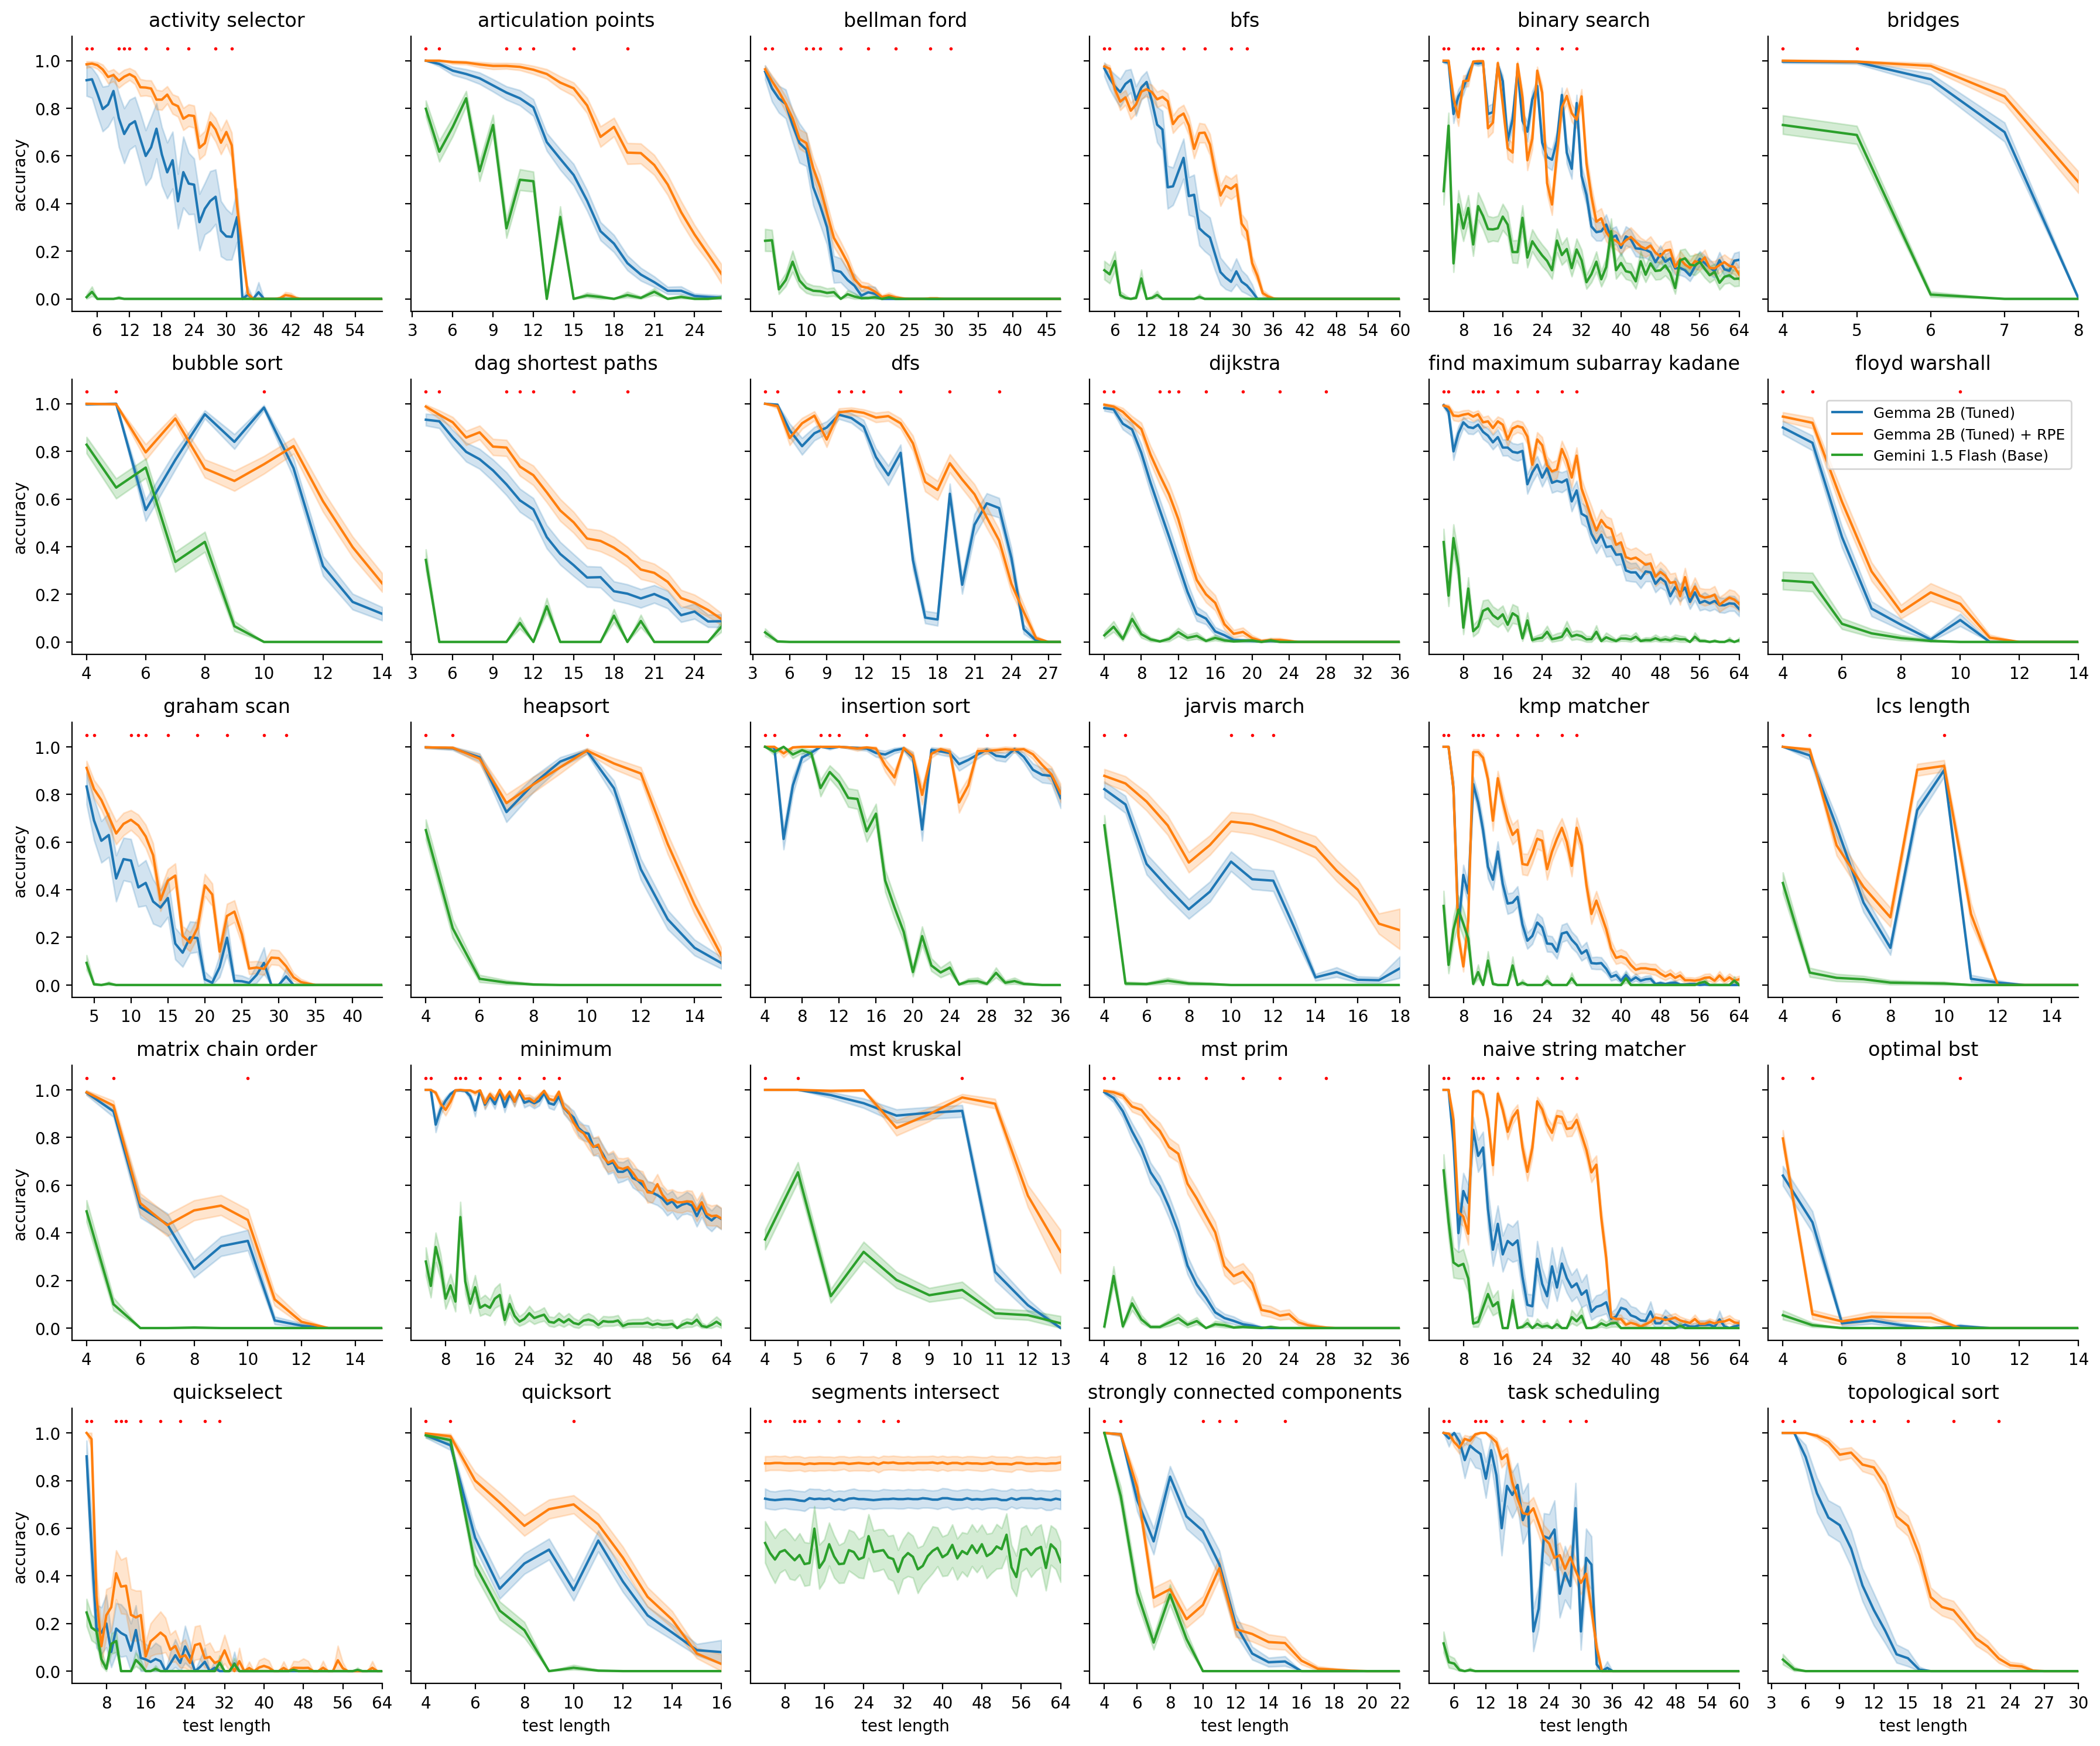

In [4]:
sns.reset_defaults()

hue_order = ['Gemma 2B (Tuned)',
             'Gemma 2B (Tuned) + RPE',
             'Gemini 1.5 Flash (Base)']

g = sns.FacetGrid(df, col='algorithm',
                  col_wrap=6, hue='experiment', hue_order=hue_order,
                  sharex=False)
g.map(sns.lineplot, 'test_length', 'accuracy')
g.set_titles('{col_name}')

max_len = df.groupby('algorithm').test_length.max()

for ax in g.axes:
  alg = ax.title.get_text()
  ax.set_title(alg.replace('_', ' '))
  train_lengths = train_lengths_dict[alg]
  ax.scatter(train_lengths, np.ones(len(train_lengths)) + 0.05, color='red', s=1.0)
  ax.set_xlim(None, max_len[alg])
  ax.xaxis.set_major_locator(MaxNLocator(integer=True))

g.axes[11].legend(loc='upper right', bbox_to_anchor=(1.0,0.95), fontsize=9, title='')
g.set_xlabels('test length')

plt.show()

In [5]:
df2 = df[(df['algorithm'] == 'quicksort')
| (df['algorithm'] == 'binary_search')
| (df['algorithm'] == 'find_maximum_subarray_kadane')
| (df['algorithm'] == 'activity_selector')
| (df['algorithm'] == 'matrix_chain_order')
| (df['algorithm'] == 'bfs')
| (df['algorithm'] == 'naive_string_matcher')
| (df['algorithm'] == 'graham_scan')
]


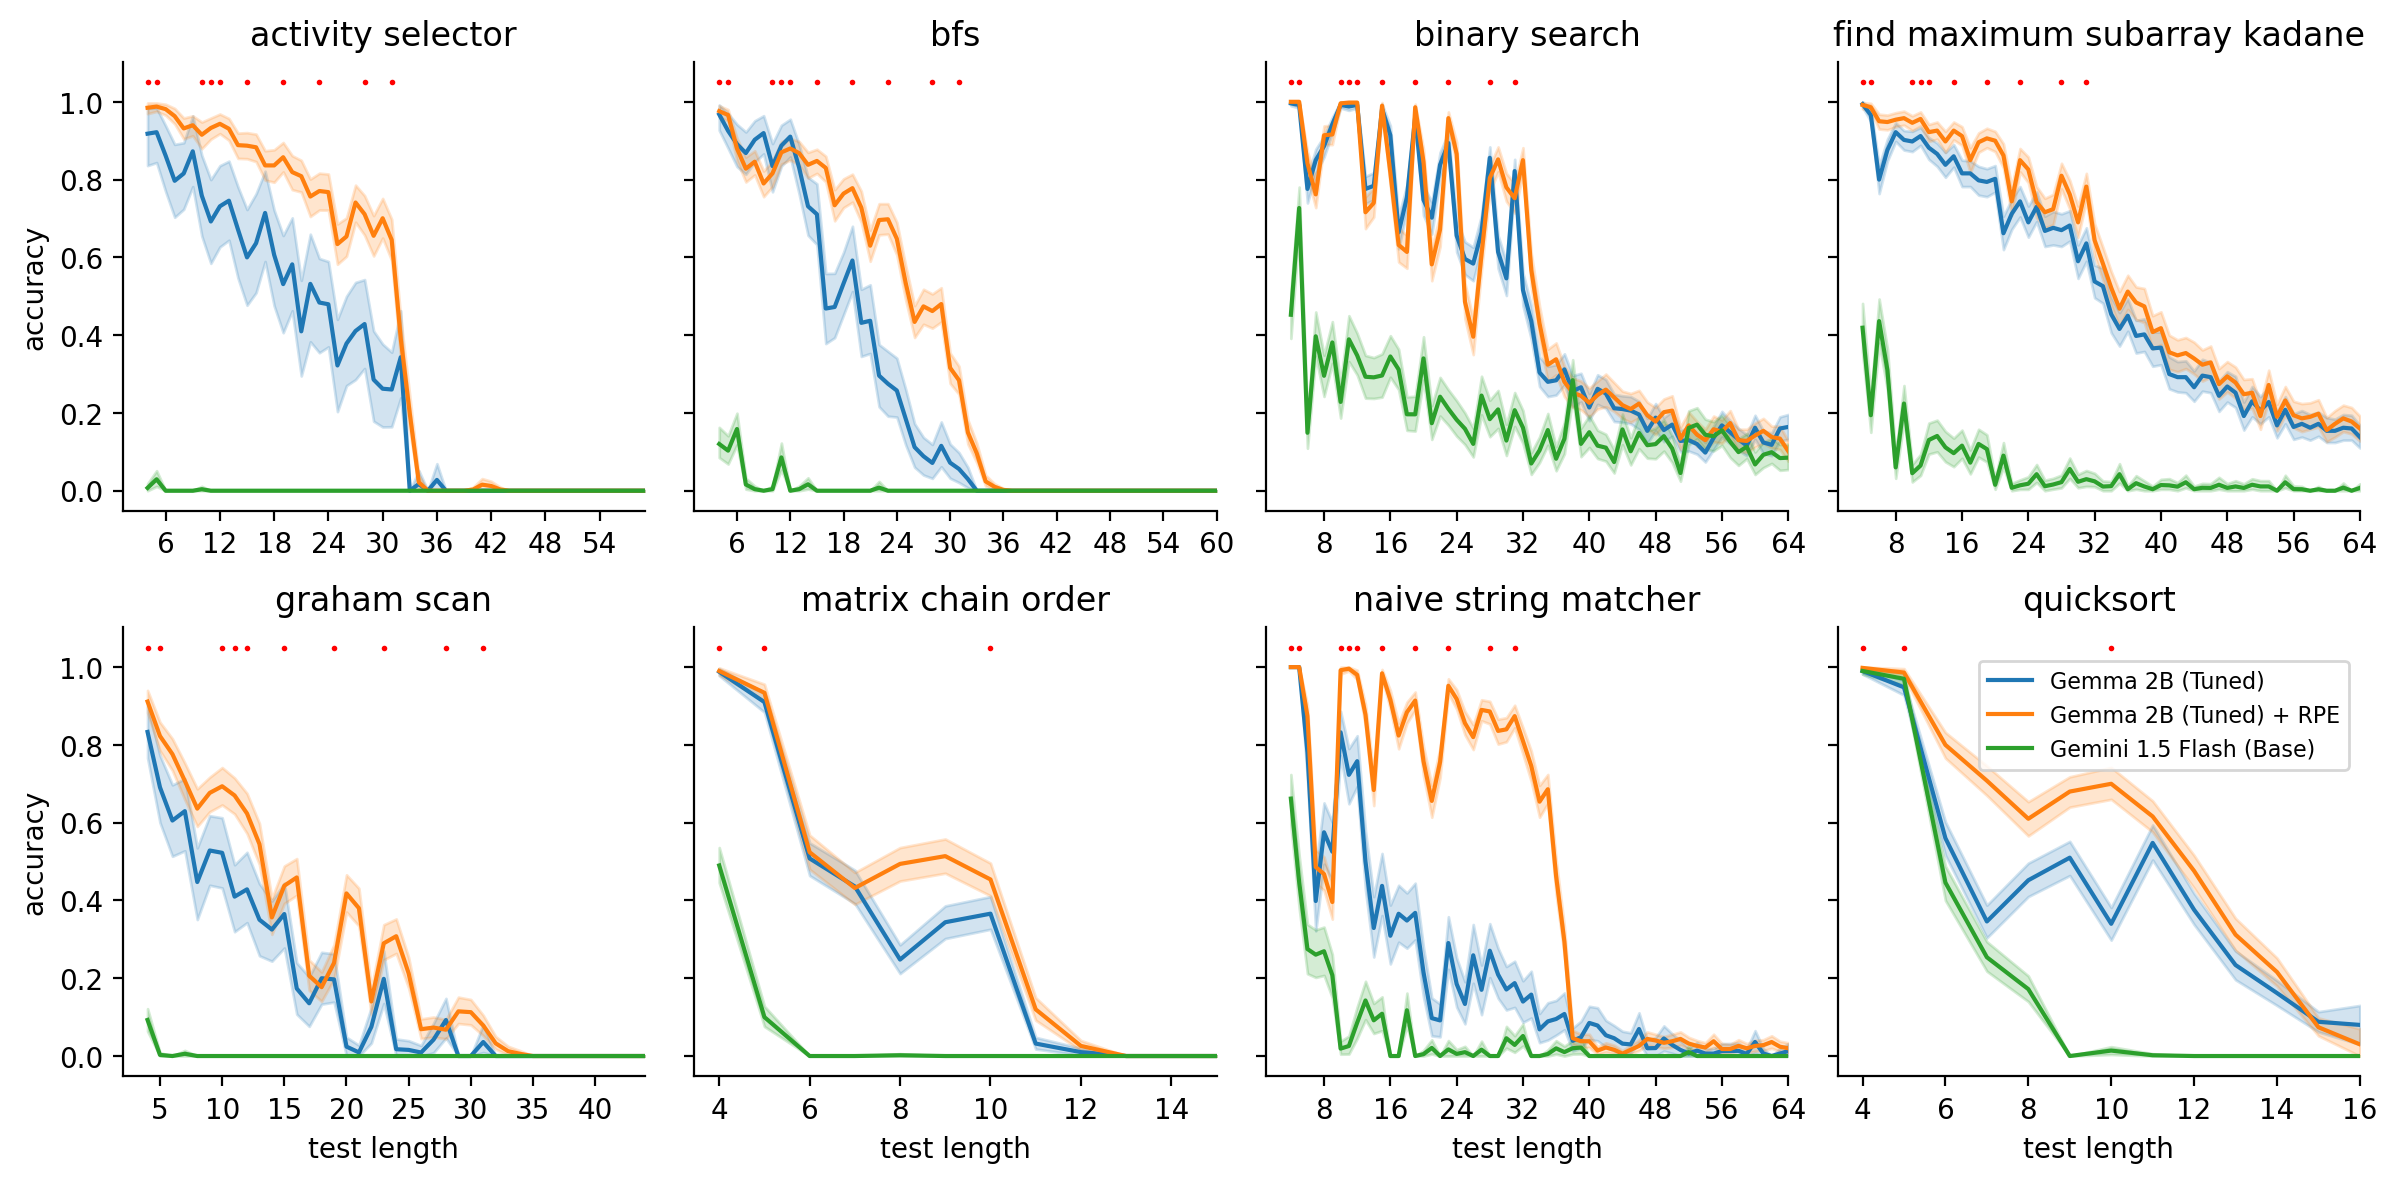

In [8]:
g = sns.FacetGrid(df2, col='algorithm', col_wrap=4,
                  hue='experiment', hue_order=hue_order,
                  sharex=False, legend_out = False)
g.map(sns.lineplot, 'test_length', 'accuracy')
g.set_titles('{col_name}')

max_len = df2.groupby('algorithm').test_length.max()


for ax in g.axes:
  alg = ax.title.get_text()
  ax.set_title(alg.replace('_', ' '))
  train_lengths = train_lengths_dict[alg]
  ax.scatter(train_lengths, np.ones(len(train_lengths)) + 0.05, color='red', s=1.0)
  ax.set_xlim(None, max_len[alg])
  ax.xaxis.set_major_locator(MaxNLocator(integer=True))

g.axes[7].legend(loc='upper right', bbox_to_anchor=(1.0,0.95), fontsize=8, title='')
g.set_xlabels('test length')

plt.show()